In [9]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.DataFrame(pd.read_csv("zillow.csv"))

In [12]:
df.head()

,zpid,rawHomeStatusCd,marketingStatusSimplifiedCd,imgSrc,hasImage,detailUrl,statusType,statusText,price,priceLabel,...,buildingId,isBuilding,canSaveBuilding,isCdpResult,style,unitCount,isComingSoonCommunity,lotId,variableData.type,variableData.text
0,13034403.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/18d60c54d4a...,True,/homedetails/1132-Kingston-St-Aurora-CO-80010/...,FOR_SALE,House for sale,"$375,000",$375K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,247388652.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/39deae31418...,True,/homedetails/3568-Central-Park-Blvd-Denver-CO-...,FOR_SALE,Townhouse for sale,"$323,622",$324K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,337664610.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/a52d0974a9f...,True,/homedetails/2670-Arapahoe-St-Denver-CO-80205/...,FOR_SALE,Townhouse for sale,"$323,000",$323K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68047903.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/439e223ed32...,True,/homedetails/21376-E-55th-Pl-Denver-CO-80249/6...,FOR_SALE,House for sale,"$370,040",$370K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13077301.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/d2d6be4ed6d...,True,/homedetails/2239-S-Truckee-St-Aurora-CO-80013...,FOR_SALE,House for sale,"$519,000",$519K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(502, 100)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 100 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   zpid                                                 498 non-null    float64
 1   rawHomeStatusCd                                      498 non-null    object 
 2   marketingStatusSimplifiedCd                          498 non-null    object 
 3   imgSrc                                               502 non-null    object 
 4   hasImage                                             499 non-null    object 
 5   detailUrl                                            502 non-null    object 
 6   statusType                                           502 non-null    object 
 7   statusText                                           500 non-null    object 
 8   price                                                502 non-null    

zpid = unique id
detailUrl = url to home
price = objective of analysis
address = address
beds
baths
area
timeonZillow
latLong.latitude
latLong.longitude
hdpData.homeInfo.zipcode
hdpData.homeInfo.homeType
hdpData.homeInfo.zestimate
hdpData.homeInfo.taxAssessedValue



In [33]:
categories = ['zpid',
'detailUrl',
'price',
'address',
'beds',
'baths',
'area',
'timeonZillow',
'latLong.latitude',
'latLong.longitude',
'hdpData.homeInfo.zipcode',
'hdpData.homeInfo.homeType',
'hdpData.homeInfo.zestimate',
'hdpData.homeInfo.taxAssessedValue']

In [34]:
denver = df[df.columns.intersection(categories)]

In [35]:
denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   zpid                               498 non-null    float64
 1   detailUrl                          502 non-null    object 
 2   price                              502 non-null    object 
 3   address                            500 non-null    object 
 4   beds                               498 non-null    float64
 5   baths                              498 non-null    float64
 6   area                               498 non-null    float64
 7   latLong.latitude                   502 non-null    float64
 8   latLong.longitude                  502 non-null    float64
 9   hdpData.homeInfo.zipcode           498 non-null    float64
 10  hdpData.homeInfo.homeType          498 non-null    object 
 11  hdpData.homeInfo.zestimate         277 non-null    float64

In [36]:
denver.head()

,zpid,detailUrl,price,address,beds,baths,area,latLong.latitude,latLong.longitude,hdpData.homeInfo.zipcode,hdpData.homeInfo.homeType,hdpData.homeInfo.zestimate,hdpData.homeInfo.taxAssessedValue
0,13034403.0,/homedetails/1132-Kingston-St-Aurora-CO-80010/...,"$375,000","1132 Kingston Street, Aurora, CO 80010",3.0,2.0,1932.0,39.733616,-104.858630,80010.0,SINGLE_FAMILY,382800.0,405000.0
1,247388652.0,/homedetails/3568-Central-Park-Blvd-Denver-CO-...,"$323,622","3568 Central Park Boulevard, Denver, CO 80238",3.0,3.0,1605.0,39.766560,-104.890100,80238.0,TOWNHOUSE,323000.0,304300.0
2,337664610.0,/homedetails/2670-Arapahoe-St-Denver-CO-80205/...,"$323,000","2670 Arapahoe Street, Denver, CO 80205",3.0,2.0,1138.0,39.757732,-104.982574,80205.0,TOWNHOUSE,317600.0,314000.0
3,68047903.0,/homedetails/21376-E-55th-Pl-Denver-CO-80249/6...,"$370,040","21376 E 55th Place, Denver, CO 80249",3.0,3.0,1509.0,39.796684,-104.739204,80249.0,SINGLE_FAMILY,NaN,344600.0
4,13077301.0,/homedetails/2239-S-Truckee-St-Aurora-CO-80013...,"$519,000","2239 S Truckee Street, Aurora, CO 80013",3.0,2.0,2238.0,39.675514,-104.778760,80013.0,SINGLE_FAMILY,NaN,528600.0


In [37]:
denver.describe()

,zpid,beds,baths,area,latLong.latitude,latLong.longitude,hdpData.homeInfo.zipcode,hdpData.homeInfo.zestimate,hdpData.homeInfo.taxAssessedValue
count,4.980000e+02,498.000000,498.000000,498.000000,502.000000,502.000000,498.000000,277.000000,477.000000
mean,9.848157e+07,3.399598,2.552209,1806.230924,39.755505,-104.893170,80125.128514,469267.148014,470800.639413
std,3.084910e+08,0.642993,0.620155,503.088974,0.100406,0.145124,138.628709,64457.482084,79925.757084
min,1.294253e+07,3.000000,2.000000,809.000000,39.565760,-105.336560,80002.000000,292900.000000,48000.000000
25%,1.306410e+07,3.000000,2.000000,1434.250000,39.672111,-105.016235,80014.000000,431400.000000,422900.000000
50%,1.332796e+07,3.000000,2.000000,1730.000000,39.741177,-104.870220,80031.000000,479400.000000,482834.000000
75%,5.888865e+07,4.000000,3.000000,2081.750000,39.844182,-104.792234,80224.000000,517600.000000,524520.000000
max,2.096283e+09,7.000000,5.000000,3535.000000,39.974854,-104.223030,80640.000000,609600.000000,644300.000000


In [38]:
denver.isnull().sum()*100/denver.shape[0]

zpid                                  0.796813
detailUrl                             0.000000
price                                 0.000000
address                               0.398406
beds                                  0.796813
baths                                 0.796813
area                                  0.796813
latLong.latitude                      0.000000
latLong.longitude                     0.000000
hdpData.homeInfo.zipcode              0.796813
hdpData.homeInfo.homeType             0.796813
hdpData.homeInfo.zestimate           44.820717
hdpData.homeInfo.taxAssessedValue     4.980080
dtype: float64

In [51]:
denver['price'] = denver['price'].str.replace('From', '').str.replace(',', '').str.replace('$', '').astype(int)

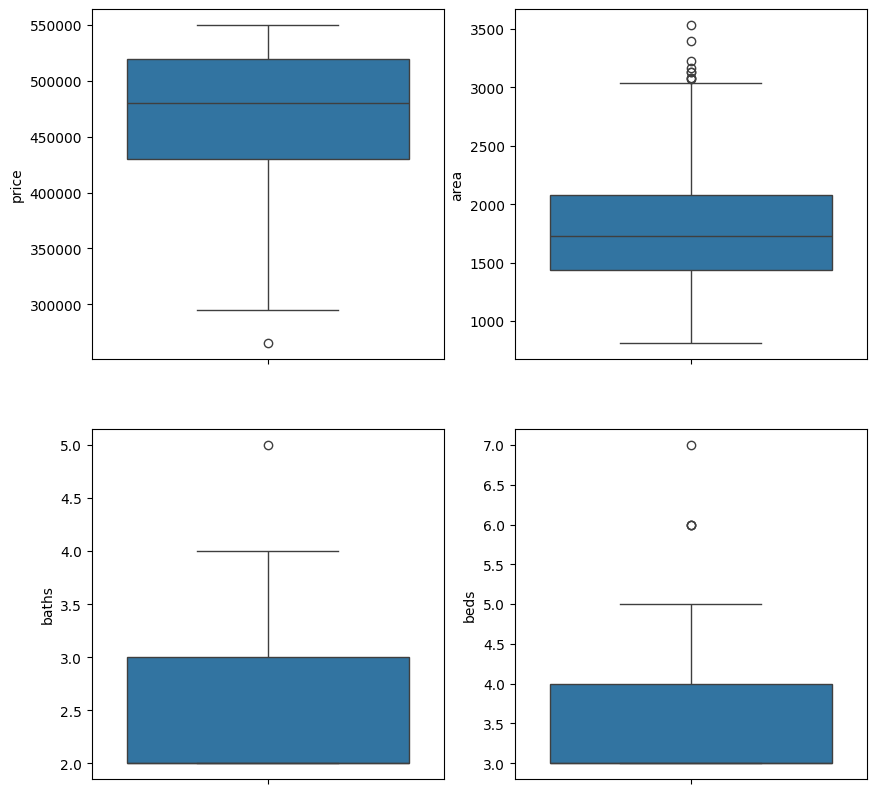

In [52]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,10))
plt1 = sns.boxplot(denver['price'], ax = axs[0,0])
plt2 = sns.boxplot(denver['area'], ax = axs[0,1])
plt3 = sns.boxplot(denver['baths'], ax = axs[1,0])
plt1 = sns.boxplot(denver['beds'], ax = axs[1,1])
# plt2 = sns.boxplot(denver['hdpData.homeInfo.zestimate'], ax = axs[1,1])
# plt3 = sns.boxplot(denver['hdpData.homeInfo.taxAssessedValue'], ax = axs[1,2])


In [56]:
denver_compare = denver[['price','beds','baths','area','hdpData.homeInfo.zestimate','hdpData.homeInfo.taxAssessedValue']]

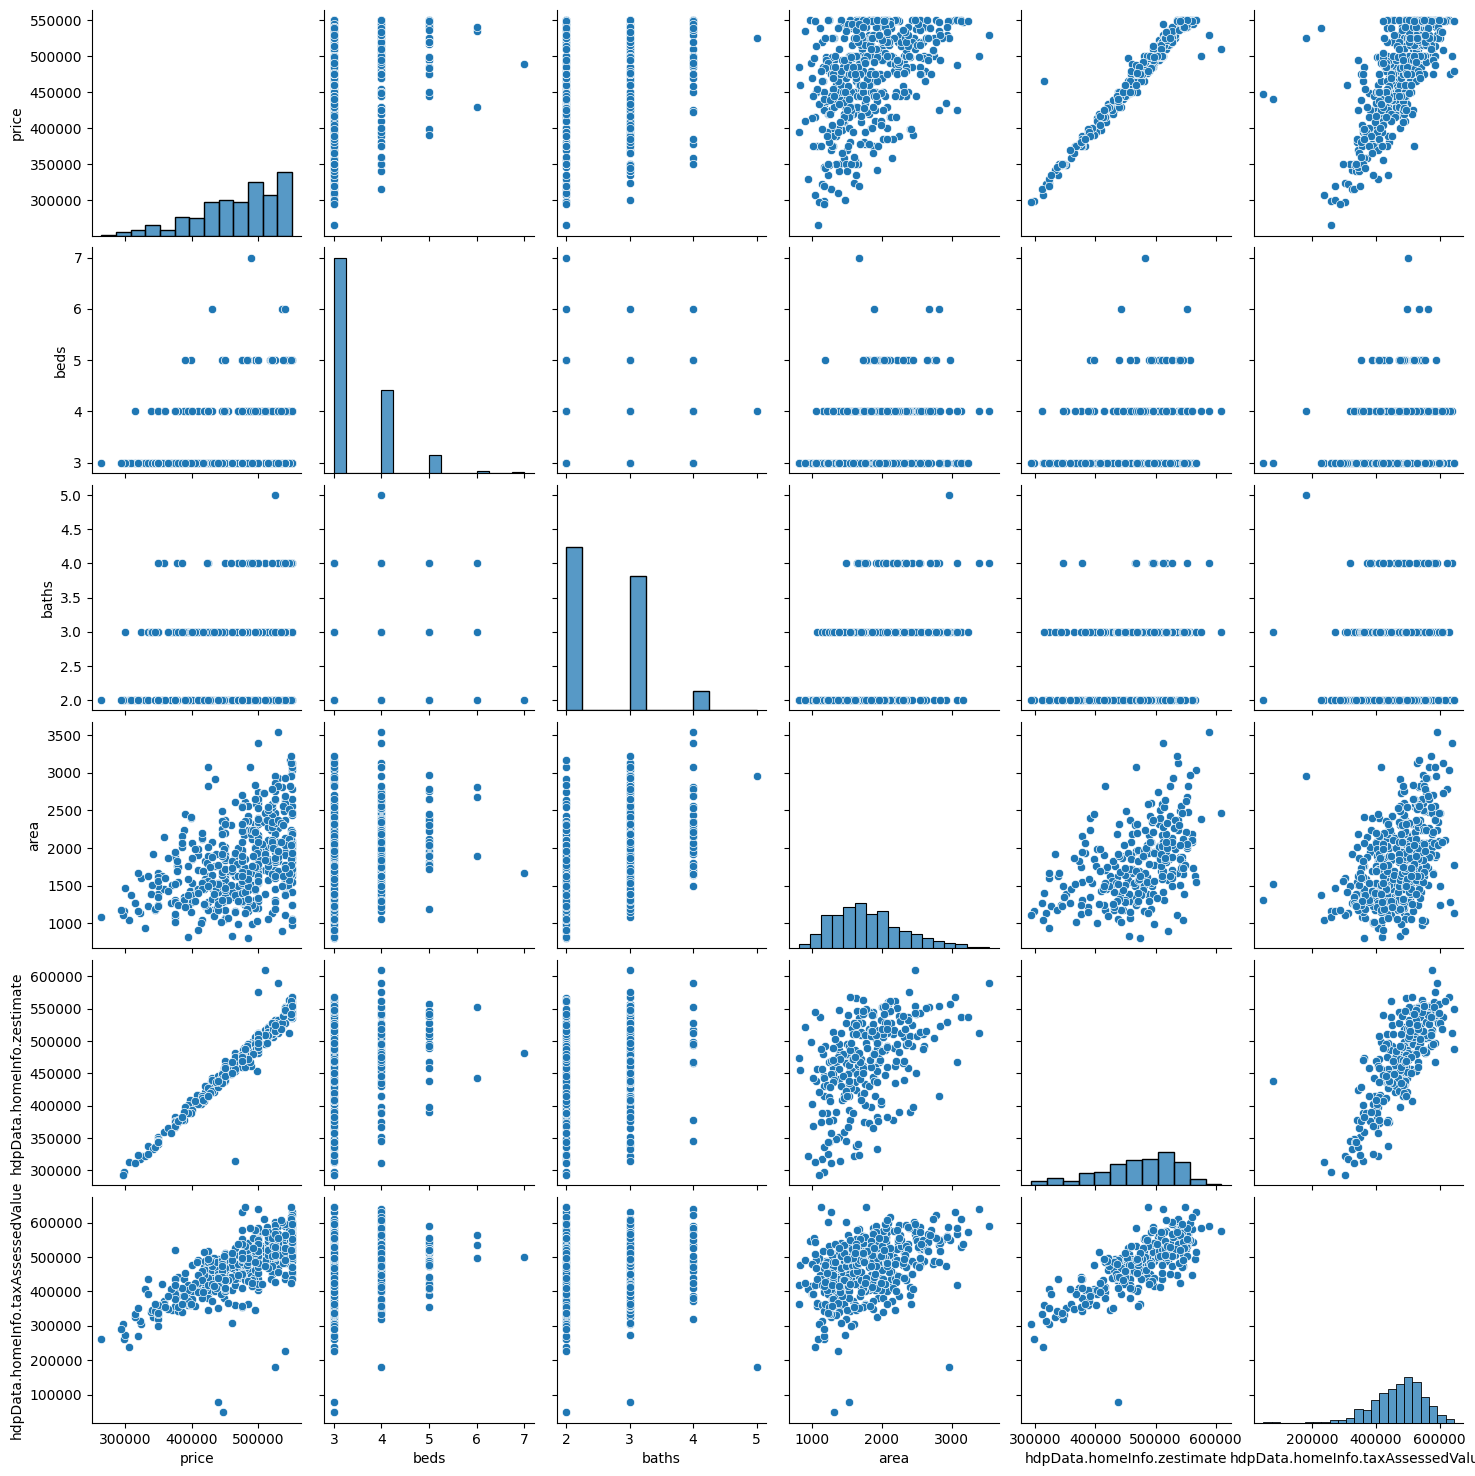

In [57]:
sns.pairplot(denver_compare)
plt.show()

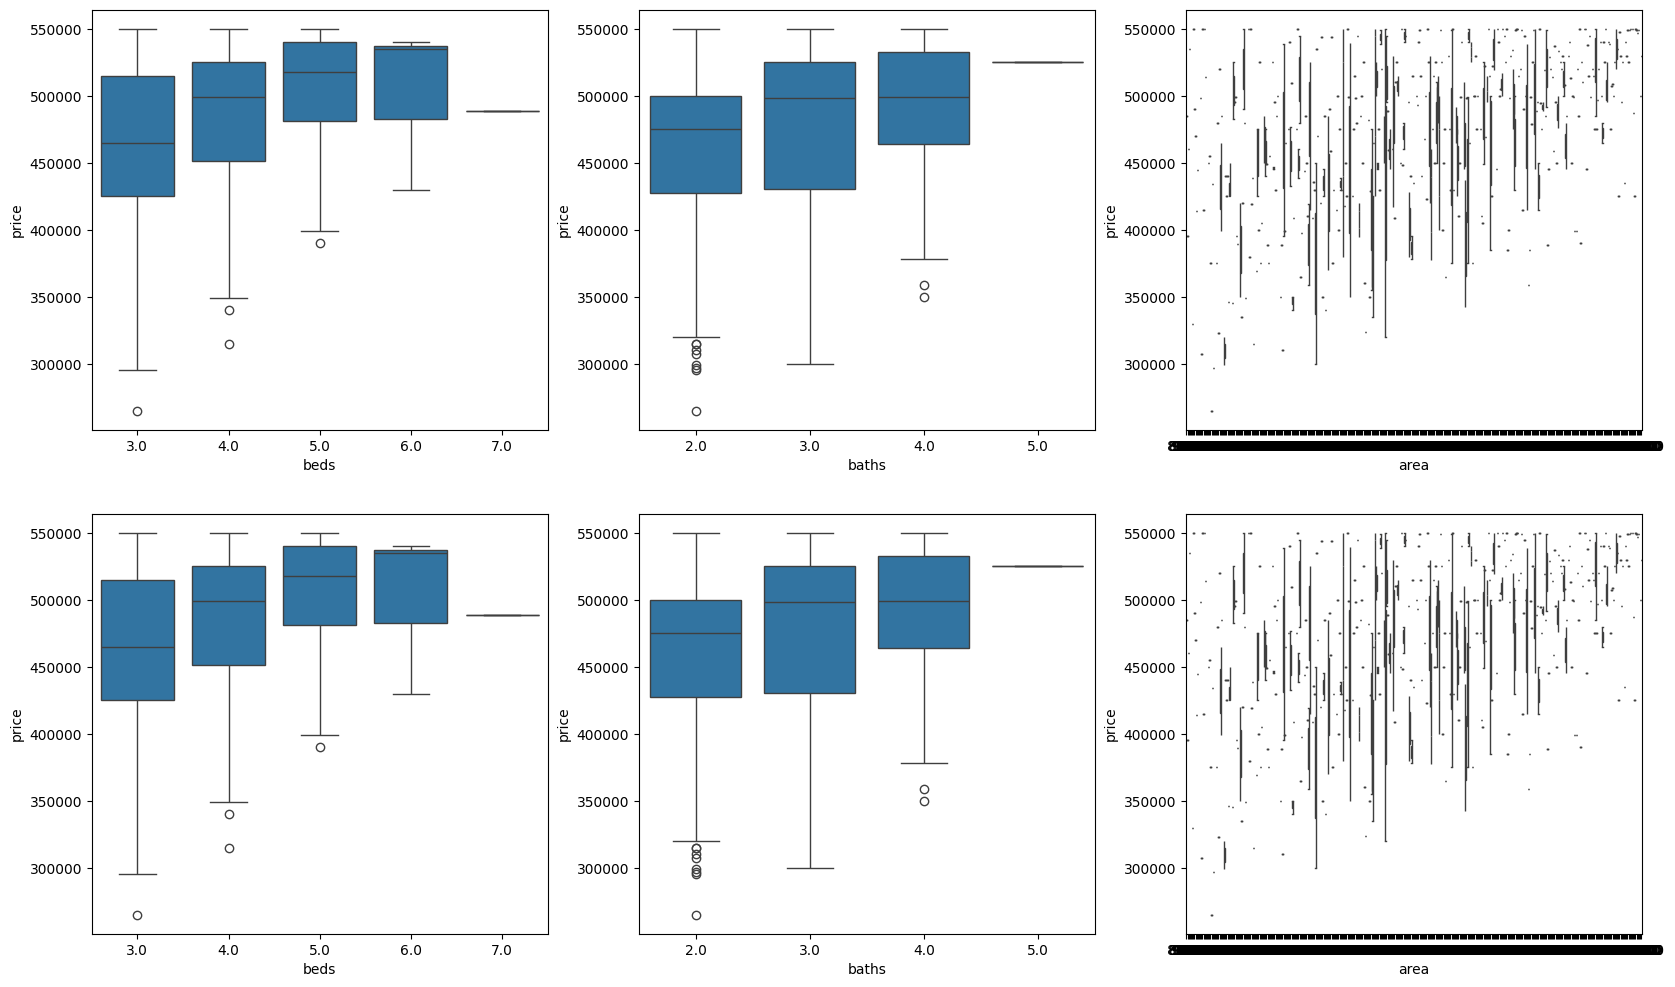

In [58]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'beds', y = 'price', data = denver)
plt.subplot(2,3,2)
sns.boxplot(x = 'baths', y = 'price', data = denver)
plt.subplot(2,3,3)
sns.boxplot(x = 'area', y = 'price', data = denver)
plt.subplot(2,3,4)
sns.boxplot(x = 'beds', y = 'price', data = denver)
plt.subplot(2,3,5)
sns.boxplot(x = 'baths', y = 'price', data = denver)
plt.subplot(2,3,6)
sns.boxplot(x = 'area', y = 'price', data = denver)
plt.show()